Generating Satellites...
Satellites Generated
Running one satellite...


Simulating : 100%|██████████| 100.00000000000321/100 [03:26<00:00,  2.07s/it] 


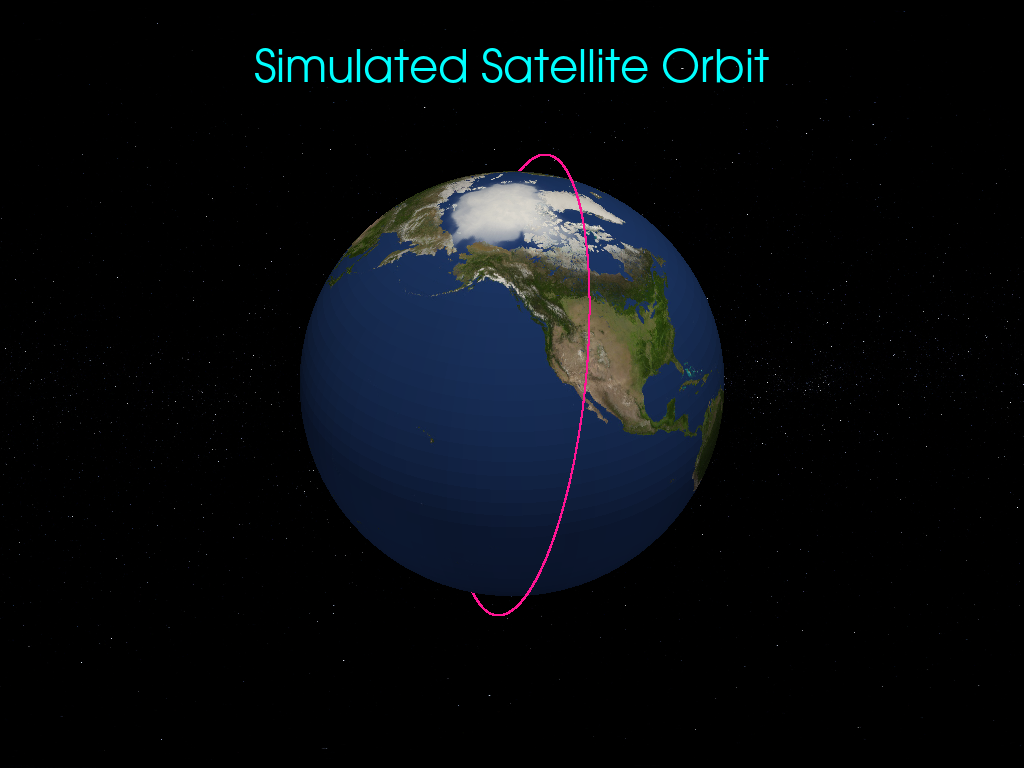

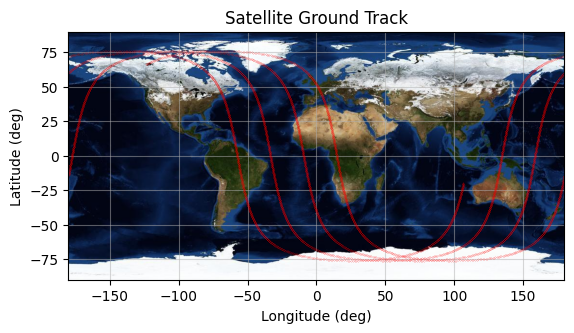

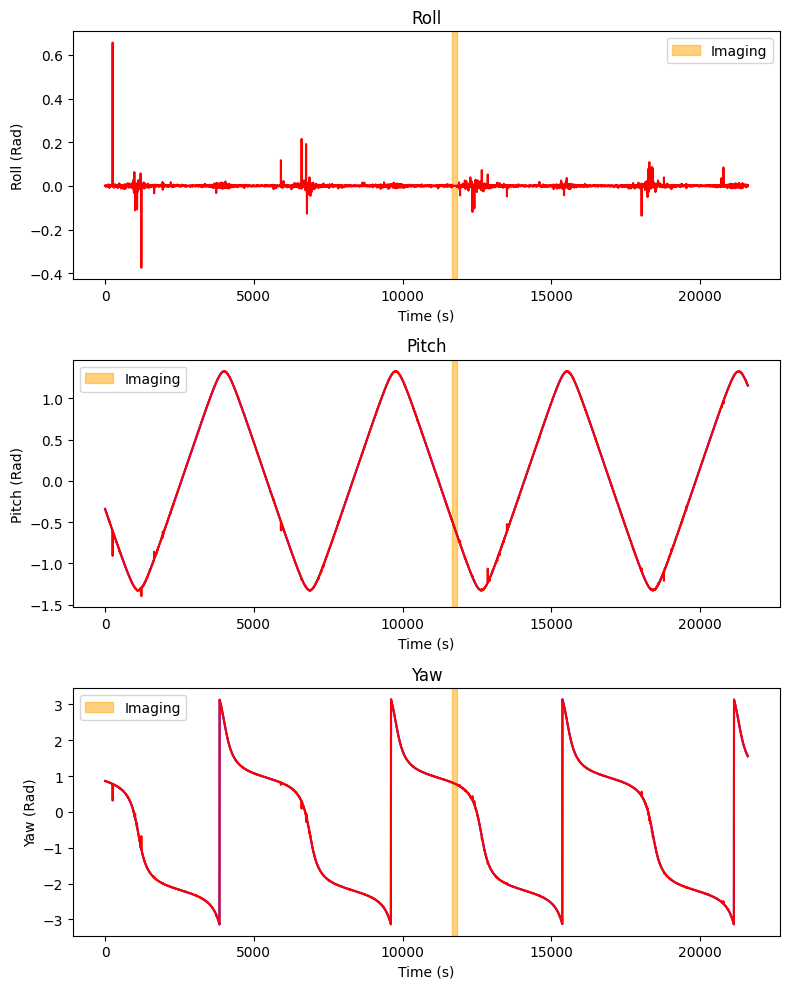

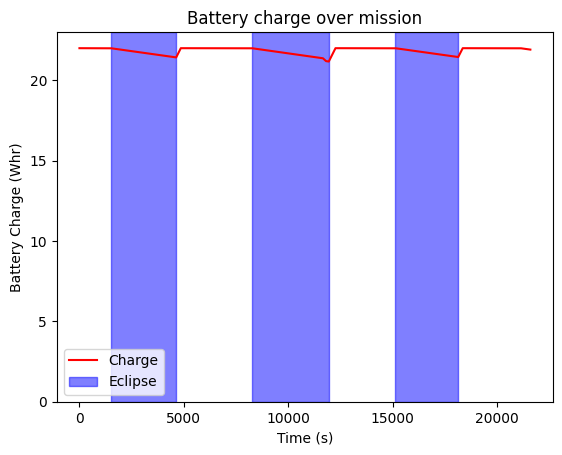

Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Comleroy.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Comleroy_historic.tif


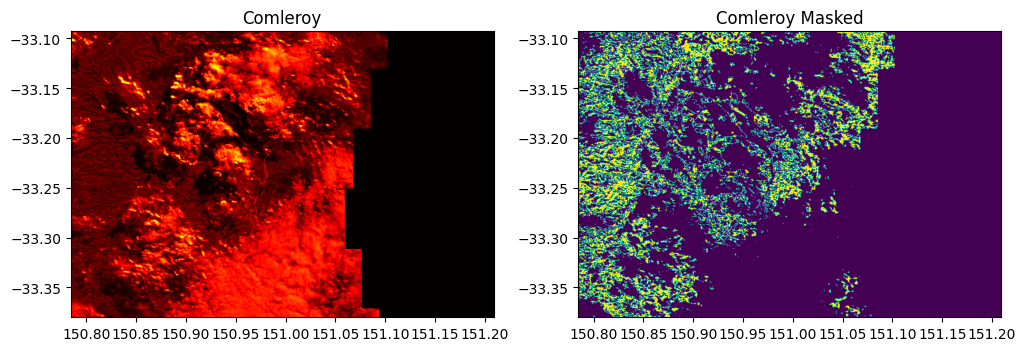

Comleroy danger percentage: 16.10105074893807
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Yaouk.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Yaouk_historic.tif


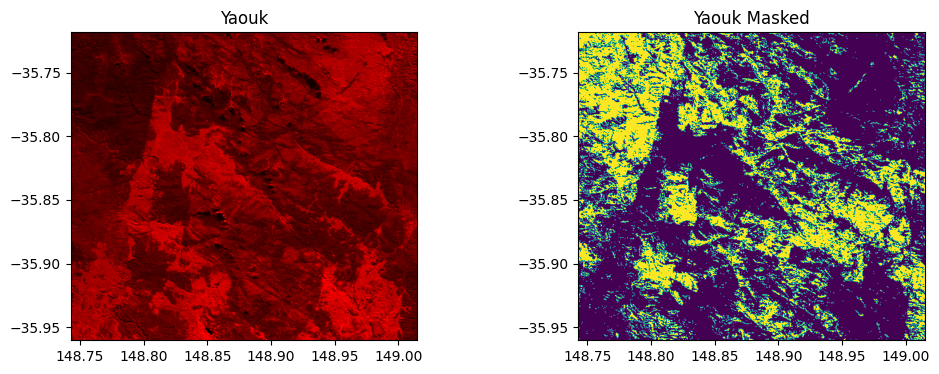

Yaouk danger percentage: 32.2539508206724
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Piliga.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Piliga_historic.tif


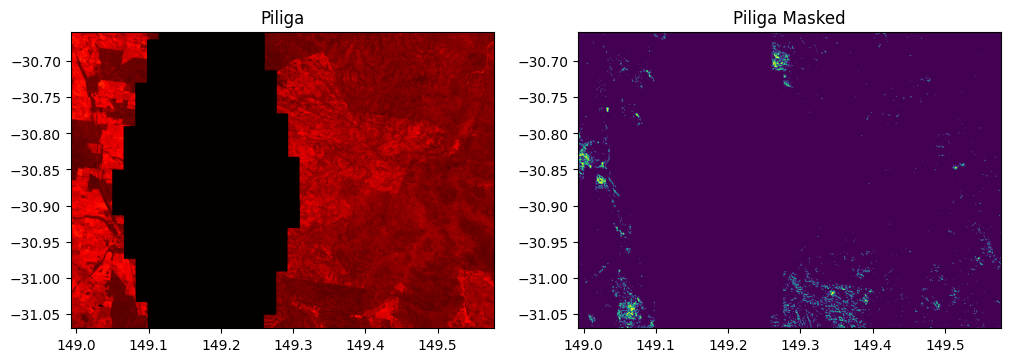

Piliga danger percentage: 1.0627849141745196
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\BlueMountains.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\BlueMountains_historic.tif


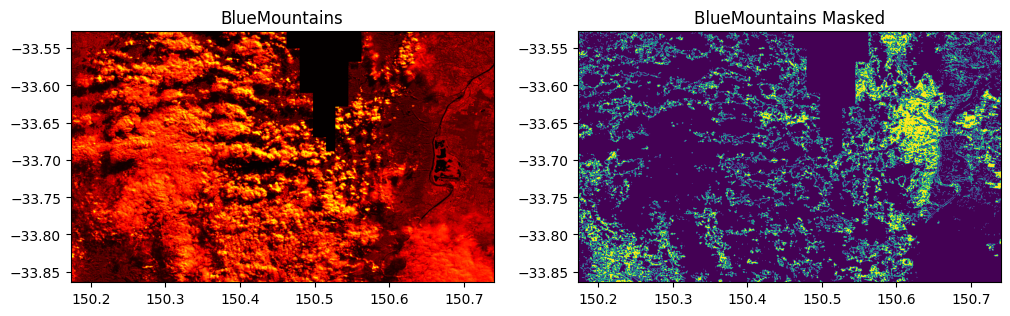

BlueMountains danger percentage: 16.15928270042194
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Comleroy.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Comleroy_historic.tif


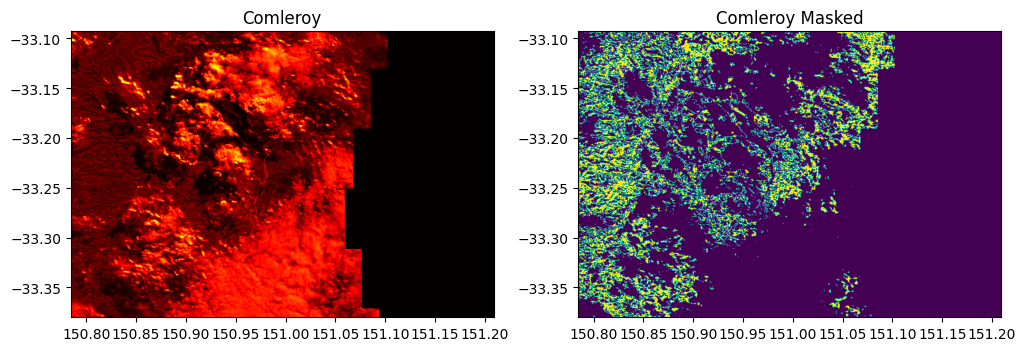

Comleroy danger percentage: 16.10105074893807
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Yaouk.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Yaouk_historic.tif


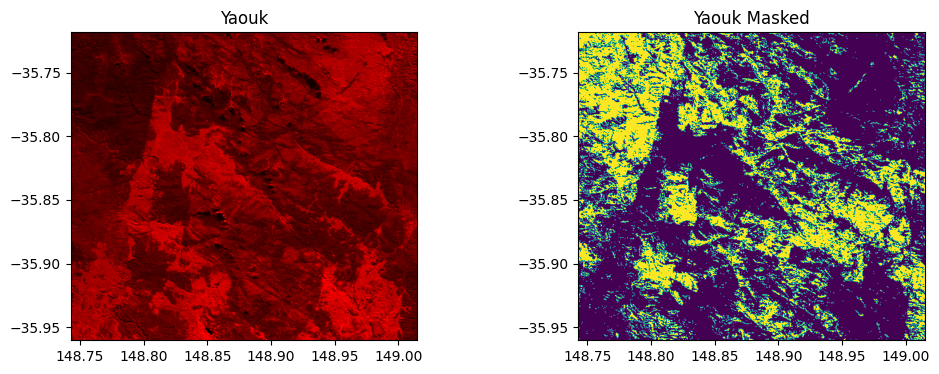

Yaouk danger percentage: 32.2539508206724
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Piliga.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\Piliga_historic.tif


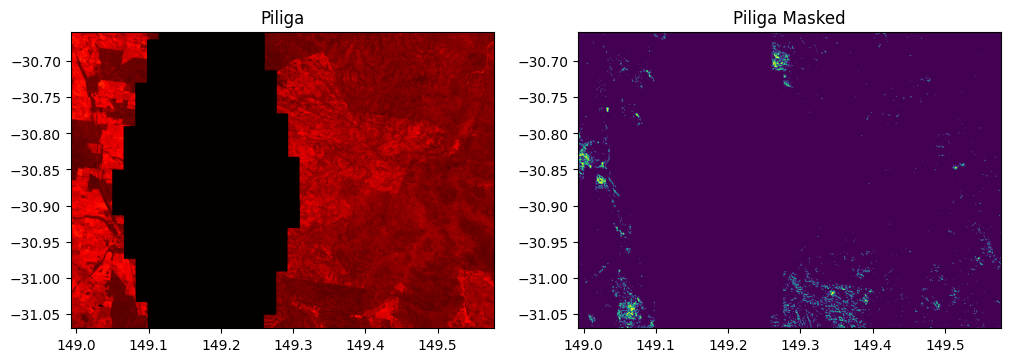

Piliga danger percentage: 1.0627849141745196
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\BlueMountains.tif
Generating URL ...
Please wait ...
Data downloaded to c:\Users\Tom\Documents\Uni\Jims Satellite Final\eeResults\BlueMountains_historic.tif


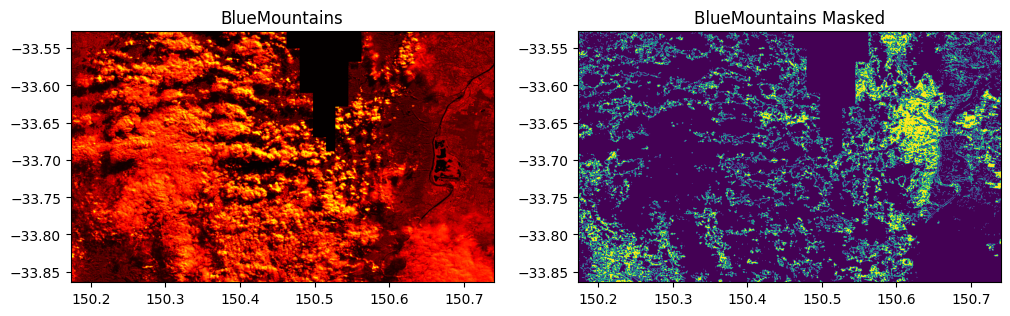

BlueMountains danger percentage: 16.15928270042194


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [6]:
import geemap
import folium
import ee
import os
import cv2
import csv
from PIL import Image
import numpy as np
import palettable 
from matplotlib import pyplot as plt
from Satellite import *
from Simulator import *
from surveyArea import surveyArea
service_account = "jims-948@jimssatellites.iam.gserviceaccount.com"
key_path = 'jimssatellites-25b0240d5cf2.json'
credentials = ee.ServiceAccountCredentials(service_account, key_path)
ee.Initialize(credentials=credentials)
mode = None
numSats = 0
sat1 = Satellite("Satellites/sat1.txt", "SAT1")
nav1 = navSatellite("navSatellites/GNSS1.txt", "GNSS1")
nav2 = navSatellite("navSatellites/GNSS2.txt", "GNSS2")
nav3 = navSatellite("navSatellites/GNSS3.txt", "GNSS3")
nav4 = navSatellite("navSatellites/GNSS4.txt", "GNSS4")
gs = groundStation(-32.9986, 148.2621, 415)


while (mode != "full_sim" and mode != "short_sim"):
    mode = input("Enter mode: ")

if (mode == "full_sim"):
    while (numSats < 1 or numSats > 12):
        numSats = int(input("Enter number of satellites between 1 and 12: "))





if (mode == "full_sim"):
    print("Generating Satellites...")
    sat1 = Satellite("Satellites/sat1.txt", "SAT1")
    sat2 = Satellite("Satellites/sat2.txt", "SAT2")
    sat3 = Satellite("Satellites/sat3.txt", "SAT3")
    sat4 = Satellite("Satellites/sat4.txt", "SAT4")
    sat5 = Satellite("Satellites/sat5.txt", "SAT5")
    sat6 = Satellite("Satellites/sat6.txt", "SAT6")  
    sat7 = Satellite("Satellites/sat7.txt", "SAT7")
    sat8 = Satellite("Satellites/sat8.txt", "SAT8")
    sat9 = Satellite("Satellites/sat9.txt", "SAT9")  
    sat10 = Satellite("Satellites/sat10.txt", "SAT10")
    sat11 = Satellite("Satellites/sat11.txt", "SAT11")
    sat12 = Satellite("Satellites/sat12.txt", "SAT12")
    satellites = [sat1,sat2,sat3,sat4,sat5,sat6,sat7,sat8,sat9,sat10,sat11,sat12]
    satellites = satellites[0:numSats]
    sim = Simulator(satellites, [nav1,nav2,nav3,nav4], [gs])
    print("Satellites Generated")
    sim.simulate(0,6*60*60,1, motionEquation)
    sim.showGroundTrack()
    sim.showOrbit() 
    sim.showAttitudes()
    sim.showCharges()
    mappingArray = []
    for sat in sim.satellites:
        csv_file = "RESULTS_"+sat.name
        with open(csv_file, mode='w', newline='') as file:
            writer = csv.writer(file)  
            i = 0      
            for image in  sat.payload.images:
                coord1 = list(image[0][0:2])
                coord2 = list(image[1][0:2])
                coord3 = list(image[2][0:2])
                coord4 = list(image[3][0:2])
                coord1.reverse()
                coord2.reverse()
                coord3.reverse()
                coord4.reverse()

                data = [coord1[0], coord1[1],  coord4[0], coord4[1], sat.payload.mappingErrors[i]]
            
                writer.writerow(data)
                roi = ee.Geometry.Rectangle([[coord1[0], coord1[1]],  [coord4[0], coord4[1]]])
                newFeature = ee.Feature(roi, {'name': str(count)})
                count = count+1
                mappingArray.append(newFeature)
                i+=1

elif (mode == "short_sim"):
    count = 0
    mappingArray = []
    print("Generating Satellites...")
    sat1 = Satellite("Satellites/sat1.txt", "SAT1")
    sat2 = Satellite("Satellites/sat2.txt", "SAT2")
    sat3 = Satellite("Satellites/sat3.txt", "SAT3")
    sat4 = Satellite("Satellites/sat4.txt", "SAT4")
    sat5 = Satellite("Satellites/sat5.txt", "SAT5")
    sat6 = Satellite("Satellites/sat6.txt", "SAT6")  
    sat7 = Satellite("Satellites/sat7.txt", "SAT7")
    sat8 = Satellite("Satellites/sat8.txt", "SAT8")
    sat9 = Satellite("Satellites/sat9.txt", "SAT9")  
    sat10 = Satellite("Satellites/sat10.txt", "SAT10")
    sat11 = Satellite("Satellites/sat11.txt", "SAT11")
    sat12 = Satellite("Satellites/sat12.txt", "SAT12")
    satellites = [sat1,sat2,sat3,sat4,sat5,sat6,sat7,sat8,sat9,sat10,sat11,sat12]
    print("Satellites Generated")
    print("Running one satellite...")

    sim = Simulator([sat1], [nav1,nav2,nav3,nav4], [gs])
    sim.simulate(0,6*60*60,5, motionEquation)
    sim.showGroundTrack()
    sim.showOrbit() 
    sim.showAttitudes()
    sim.showCharges()

    for sat in satellites:
        csv_file = "bounding/RESULTS_"+sat.name+".csv"
        count 
        with open(csv_file, mode='r', newline='') as file:
            reader = csv.reader(file)  
            i = 0
            for row in reader:
                coord1a, coord1b,  coord4a, coord4b, error = [float(param) for param in row]
                roi = ee.Geometry.Rectangle([[coord1a, coord1b],  [coord4a, coord4b]])
                newFeature = ee.Feature(roi, {'name': str(count)})
                count = count+1
                mappingArray.append(newFeature)
                count+=1
# Create an interactive map
Map = geemap.Map(center=[0, 0], zoom=2)
mappedArea = ee.FeatureCollection(mappingArray)
NSW = ee.Geometry.Rectangle([[144.81577841465915, -36.42295520530404], [155.81727106335805, -27.806830550620564]])
# Create an image collection for Sentinel-2 data
start_date = '2019-06-01'
end_date = '2020-05-31'
sentinel2_collection = (ee.ImageCollection('COPERNICUS/S2_SR')
                        .filterDate(ee.Date(start_date), ee.Date(end_date))
                        .filterBounds(NSW)
                        .select('B.*|MSK_CLDPRB|SCL')
)
burnedArea = ee.Image('projects/jimssatellites/assets/fires')
nir = sentinel2_collection.select('B8')  # Near-Infrared Band (B8)
swir1 = sentinel2_collection.select('B11')  # Short-Wave Infrared Band 1 (B11)
swir2 = sentinel2_collection.select('B12')  # Short-Wave Infrared Band 2 (B12)
##CREATE THE BLACK MASK

roi = ee.Geometry.Rectangle([ 146,-35.36,  158.6, -30.83])
#I have no idea why, but for some reason this just paints everything so I'm gonna cop for now
mask = ee.Image(0).toInt8().paint(roi, 1)
fc = ee.FeatureCollection(mappingArray)
# Fill and outline the polygons in two colors
filled = mask.paint(fc, 2)
both = filled.paint(fc, 1, 5)
# Mask off everything that matches the fill color.
result = both.mask(filled.neq(2))


nir_palette = ['000000', '330000', '660000', '990000', 'CC0000', 'FF0000', 'FF1900', 'FF3200', 'FF4B00', 'FF6400',
              'FF7D00', 'FF9600', 'FFAF00', 'FFC800', 'FFE100', 'FFFF00']
# Create a visualization palette
vis_params = {
    'min': 0,
    'max': 10000,
    'bands': ['B11'],
    'palette': nir_palette  # Apply the custom color palette for NIR
}
# Define visualization parameters for each band
nir_vis_params = {
    'min': 0,
    'max': 10000,
    'bands': 'B11',
    'palette': nir_palette  # Apply the custom color palette for NIR
}
swir_vis_params = {
    'min': 0,
    'max': 10000,
    'bands': 'B12',
    'palette': nir_palette  # Apply the custom color palette for NIR
}


#MOSAICING
swir1_mosaic = swir1.mosaic()
swir1_mosaic = swir1_mosaic.visualize(**{'bands': 'B11', 'min': 0,'max': 10000, 'palette': nir_palette})
mask = result.visualize(**{'palette': '000000,FF0000','max': 10000,'opacity': 1.0})
mosaic = ee.ImageCollection([swir1_mosaic, mask]).mosaic()


#Add the historic data to seperate mosaic
burnedVisParams = {
    'min': 0,
    'max': 255,
    'palette': [  'fcffa4', 'f2f482', 'f3e35a', 'f8cf3a', 'fbbc21', 'fca80d', 'fb9606',
  'f8850f', 'f2741c', 'eb6429', 'e15635', 'd54a41', 'c83f4b', 'bc3754',
  'ad305d', '9d2964', '8d2369', '7d1e6d', '6d186e', '5d126e', '4f0d6c',
  '3e0966', '2d0b59', '1c0c43', '0e092b', '040314', '000004']
}

roi = ee.Geometry.Rectangle([ 146,-35.36,  158.6, -30.83], None, False)
burnedAreaViz = burnedArea.visualize(**burnedVisParams)
historic_mosaic = ee.ImageCollection([swir1_mosaic, burnedAreaViz, mask]).mosaic()


def getDangerRating(ratio):
    if ratio>= 0 and ratio<= 5:
        return "MODERATE"
    elif ratio>5 and ratio<= 15:
        return "HIGH"
    elif ratio>15 and ratio<25:
        return "EXTREME"
    else:
        return "CATASTROPHIC"




current_directory = os.getcwd()
out_dir = os.path.join(current_directory)

surveyArea("Comleroy", mosaic, historic_mosaic, -33.38, -33.0931176, 150.78448429, 151.2087900435)
surveyArea("Yaouk", mosaic, historic_mosaic,  -35.96021682698345, -35.71831894036284, 148.7428497953762, 149.0150704273652)
surveyArea("Piliga", mosaic, historic_mosaic,  -31.069826237629815, -30.659188247907124, 148.99253089357404, 149.57756512477508)
surveyArea("BlueMountains", mosaic, historic_mosaic,  -33.864175153202225,-33.527763870555276, 150.1730435186614, 150.74008344975258)

# Read data from a CSV file
with open('regions.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        area_name = row['AreaName']
        minLat = float(row['minLat'])
        maxLat = float(row['maxLat'])
        minLong = float(row['minLong'])
        maxLong = float(row['maxLong'])
        # Call the surveyArea function with values from the CSV
        surveyArea(area_name, mosaic, historic_mosaic, minLat, maxLat, minLong, maxLong)


Map.addLayer(mosaic, {}, 'Mosaic')
Map.addLayer(historic_mosaic, {}, "historic_mosaic")
Map
